# Problem Statement

It's very important for credit card companies to recognize and stop a fraud transaction. Identifying a fraud transaction out of total no of legitimate transaction is quite a difficulat task as fraud transaction out of legitimate transaction is very less. But ML model can help in recognizing a fraud transaction. The final aim of this model is to recognize a fraud transaction and follow necessary measures so that customers are not charged for items that they did not purchase.

# Loading Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None                            

from IPython.core.interactiveshell import InteractiveShell         
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv('D:/Study material/Datasets/Credit_default/creditcard.csv')

# Overview of Dataset

In [4]:
data.shape

(284807, 31)

In [5]:
data.head()

# Feature V1,v2,V3,........,V26,V27,V28 are PCA transformed. Only Time and Amount are not transformed.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Cleaning

In [8]:
msng = data.isnull().sum()
msng_percnt = (msng/len(data))*100
pd.concat([msng,msng_percnt], axis=1, keys=['Missing Values','Missing Percentage'])

# No values are missing

,Missing Values,Missing Percentage
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


# Check for duplicate Data

In [9]:
data.drop_duplicates(keep='first',ignore_index=True,inplace=True)
data.shape

# removed 1081 duplicate observation

(283726, 31)

# Dividing data into train and test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train,test = train_test_split(data,test_size=0.2, shuffle=True,random_state=10)

train.shape
test.shape

(226980, 31)

(56746, 31)

In [12]:
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
119483,75646.0,-0.868316,0.310385,2.440775,-0.923164,-0.124800,0.116584,0.070864,0.434674,0.291963,-1.047113,0.946985,0.911082,-0.581674,-0.312058,-1.516148,0.558790,-0.703110,-0.244147,-1.759019,-0.287490,0.109391,0.346733,-0.058498,0.226926,-0.390286,-0.043309,0.097176,0.123567,5.88,0
17752,28931.0,-0.797899,1.924714,-0.496497,0.649641,0.559371,0.020042,-0.015066,-3.396142,-0.289837,0.469879,-1.204169,0.272353,0.673993,0.421552,0.598156,-0.306965,-0.237618,0.125020,0.634913,-0.588350,3.122428,-0.537665,0.327733,-0.474439,-0.504046,-0.338321,0.615687,0.239678,22.16,0
185301,126901.0,-0.772459,0.927688,-0.587299,-2.056678,2.620595,3.670107,-0.013384,0.929972,0.995876,-0.370534,0.331056,-0.173121,-0.320220,-1.635131,0.915730,0.419224,0.148053,0.202274,-0.537258,0.418465,-0.377347,-0.767952,-0.017241,0.553453,-0.066833,-0.264769,0.217343,-0.002995,2.69,0
21013,31455.0,-2.470088,1.445333,1.449623,1.991840,1.299102,2.278487,1.572548,-0.616953,0.890520,4.830925,2.979414,0.286641,0.221534,-1.442123,1.994828,-1.737175,0.132407,-1.757604,-0.705283,1.362997,-0.561796,0.758427,-0.232501,-1.015471,-0.510158,0.037589,-0.230830,-0.679720,76.07,0
247171,153790.0,2.075014,-1.331194,0.257760,-0.715151,-1.496807,0.570541,-1.781122,0.369112,0.748240,0.668248,0.397343,0.519973,0.039952,-1.034241,-1.699330,1.105779,0.241920,-0.789742,1.094459,-0.031798,0.183021,0.780388,0.269328,0.797639,-0.357503,-0.244888,0.054289,-0.040469,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270508,164615.0,-1.456628,0.120555,1.095222,-0.137410,-0.186372,-0.653156,0.056174,0.459775,0.060210,-0.948777,-0.929606,0.526948,0.917773,0.118923,0.880481,0.089334,-0.351326,0.416249,-0.082522,0.427082,0.400348,0.885240,-0.045997,0.021060,0.087074,-0.141906,0.265186,0.040424,100.00,0
227625,145524.0,2.039635,-0.460513,-2.629294,-0.722905,0.714746,-0.953566,0.689279,-0.464711,0.613706,-0.194489,-1.470152,-0.120237,-0.334814,0.610755,0.033825,-0.551754,-0.234030,-0.502443,0.789715,0.005825,0.083660,0.208888,-0.158554,0.141072,0.386191,1.078186,-0.165565,-0.077410,95.95,0
208336,137401.0,1.692321,-0.997218,-0.631185,-0.310062,-0.662933,-0.091857,-0.490497,-0.010481,0.664146,0.024541,1.211579,1.618256,1.514274,-0.171112,0.139135,0.739503,-0.898919,0.297572,0.045363,0.304594,0.314867,0.668945,0.090051,0.896253,-0.514676,1.193882,-0.113244,-0.029710,168.90,0
222184,143214.0,-0.347819,1.151160,-0.886069,0.001936,1.271999,-1.405851,0.926867,-0.169514,-0.368047,-1.450472,1.668231,-0.315450,-1.022118,-2.228652,0.303959,0.696950,1.710989,1.972550,-0.146845,-0.137298,0.295625,0.918560,-0.294878,-0.205210,-0.581914,-0.187790,0.151155,0.259274,18.96,0


In [13]:
X_train = train.drop(['Class'],axis=1)
Y_train = train['Class']
X_test = test.drop(['Class'],axis=1)
Y_test = test['Class']

print('Shape of X_train: ',X_train.shape)
print('Lenth of Y_traub: ',len(Y_train))
print('Shape of X_test: ',X_test.shape)
print('Length of Y_test: ',len(Y_test))

Shape of X_train:  (226980, 30)
Lenth of Y_traub:  226980
Shape of X_test:  (56746, 30)
Length of Y_test:  56746


# Pearson Correlation

In [14]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


<Figure size 1224x648 with 0 Axes>

<AxesSubplot:>

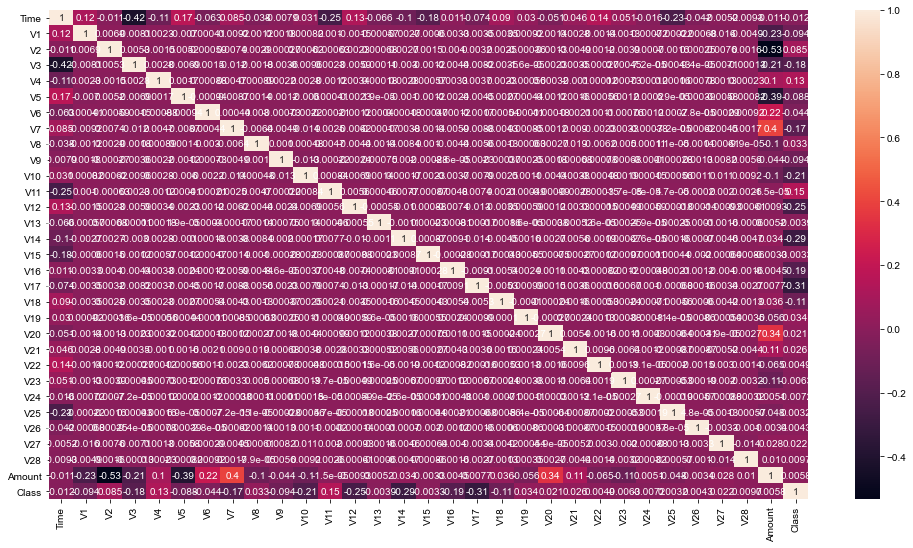

In [15]:
plt.figure(figsize=(17,9))
sns.heatmap(data.corr(), annot=True)
sns.set(font_scale=0.7)

## Exploratory Data Analysis

In [16]:
data['Class'].value_counts(normalize=True)*100

# 99.83% observation belongs to class 0. It's a imbalaced prblm

0    99.83329
1     0.16671
Name: Class, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='V2'>

<AxesSubplot:xlabel='Class', ylabel='V4'>

<AxesSubplot:xlabel='Class', ylabel='V11'>

<AxesSubplot:xlabel='Class', ylabel='V19'>

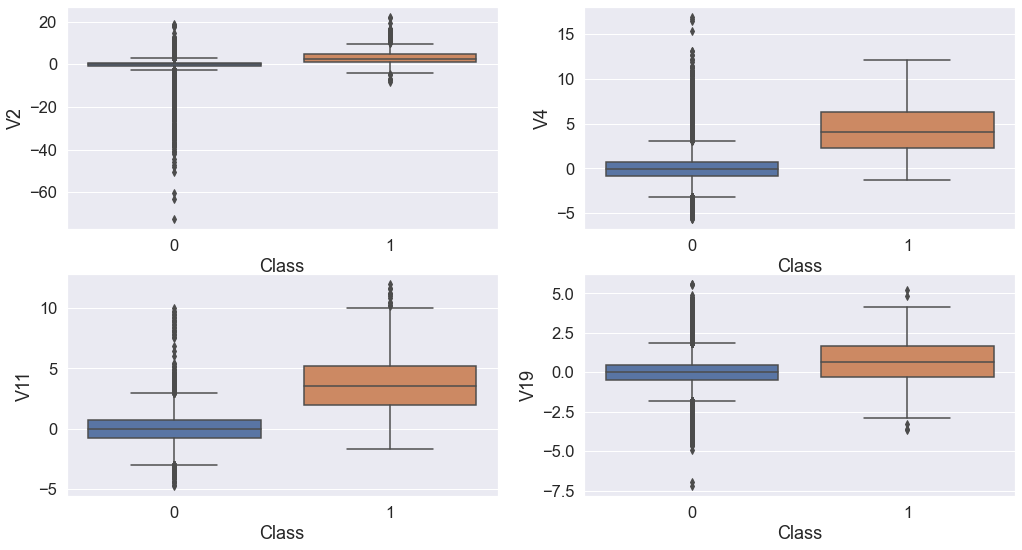

In [18]:
fig, axes=plt.subplots(ncols=2, nrows=2, figsize=(17,9))
sns.set(font_scale=1.5)

sns.boxplot(x='Class',y='V2',data=data,ax=axes[0,0])
sns.boxplot(x='Class',y='V4',data=data,ax=axes[0,1])
sns.boxplot(x='Class',y='V11',data=data,ax=axes[1,0])
sns.boxplot(x='Class',y='V19',data=data,ax=axes[1,1])

# Value of V2, V4, V11 and V19 is more for fraud transactions.

<AxesSubplot:xlabel='Class', ylabel='V10'>

<AxesSubplot:xlabel='Class', ylabel='V12'>

<AxesSubplot:xlabel='Class', ylabel='V14'>

<AxesSubplot:xlabel='Class', ylabel='V17'>

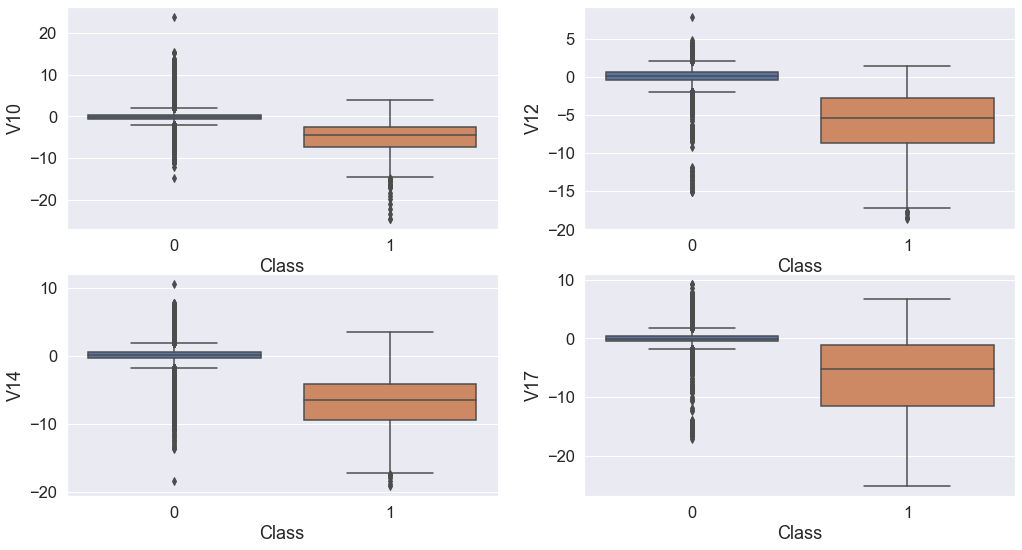

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(17,9))
sns.set(font_scale=1.5)

sns.boxplot(x='Class', y='V10', data=data, ax=axes[0,0])
sns.boxplot(x='Class', y='V12', data=data, ax=axes[0,1])
sns.boxplot(x='Class', y='V14', data=data,  ax=axes[1,0])
sns.boxplot(x='Class', y='V17', data=data, ax=axes[1,1])

# Value of V10, V12, V14 and V17 is more for legitimate transactions

In [20]:
data['Amount'].describe()
# Amount is highly left skewed. Using log for Amount.

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

<Figure size 1224x648 with 0 Axes>

<AxesSubplot:xlabel='Class', ylabel='Amount'>

Text(0, 0.5, 'Amount (in log)')

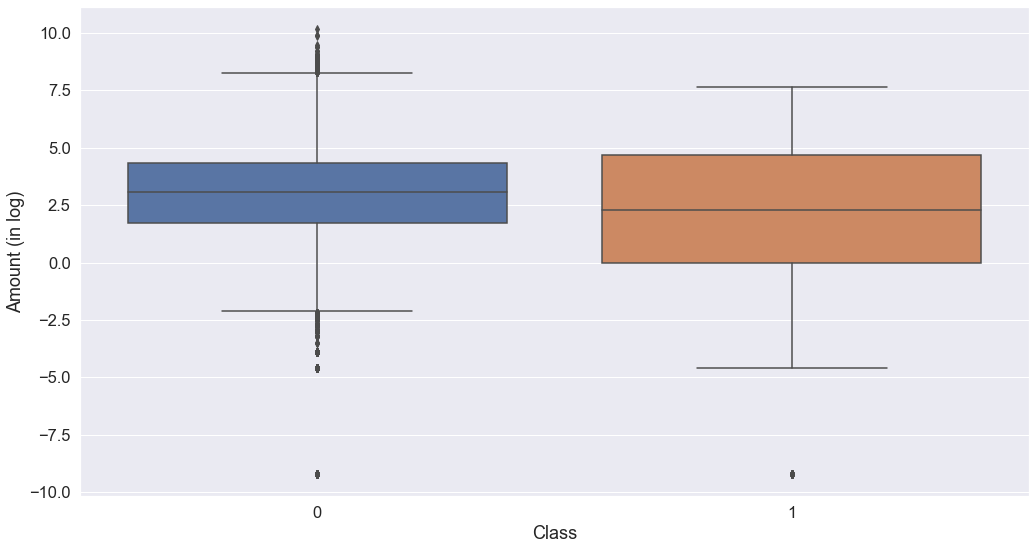

In [21]:
amount_log = np.log(data['Amount'] + 0.0001)

plt.figure(figsize=(17,9))
sns.boxplot(x=data['Class'],y=amount_log)
plt.ylabel('Amount (in log)')

# Transaction amount for fraud cases is lesser than the legitimate transaction cases mostly.

# Prediction using Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# creating a RF model with default Parameters
rdf = RandomForestClassifier(n_jobs=-1) 

# fitting the model on train
rdf.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

## On train

In [24]:
rdf_prd_trn = rdf.predict(X_train)
rdf_prd_trn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix

labels = ['Legitimate Transactions','Fraud Transactions']
pd.DataFrame(confusion_matrix(rdf_prd_trn,Y_train), index=labels,columns=labels)

,Legitimate Transactions,Fraud Transactions
Legitimate Transactions,226592,0
Fraud Transactions,0,388


In [26]:
from sklearn.metrics import accuracy_score

print('Accuracy of Random forest on train :', accuracy_score(Y_train,rdf_prd_trn))

Accuracy of Random forest on train : 1.0


## On test

In [27]:
rdf_prd_tst = rdf.predict(X_test)
rdf_prd_tst

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
pd.DataFrame(confusion_matrix(Y_test,rdf_prd_tst),index=labels,columns=labels)

,Legitimate Transactions,Fraud Transactions
Legitimate Transactions,56657,4
Fraud Transactions,25,60


In [29]:
print('Accuracy of Random forest on test :', accuracy_score(Y_test,rdf_prd_tst))

Accuracy of Random forest on test : 0.9994889507630493


In [30]:
from sklearn.metrics import classification_report

print(classification_report(rdf_prd_tst,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56682
           1       0.71      0.94      0.81        64

    accuracy                           1.00     56746
   macro avg       0.85      0.97      0.90     56746
weighted avg       1.00      1.00      1.00     56746



## ROC for Random Forest (On Significant features)

In [31]:
from sklearn.metrics import roc_auc_score,roc_curve

In [32]:
rdf_proba = rdf.predict_proba(X_test)[:,1]

In [33]:
print('AUC value for Random Forest (on default parameters):',roc_auc_score(Y_test,rdf_proba))

AUC value for Random Forest (on default parameters): 0.9630727432604852


In [34]:
fbr,tbr,thrs = roc_curve(Y_test,rdf_proba)

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'False Postive Rate (1-Specificity)')

Text(0, 0.5, 'True Positive Rate (Recall)')

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC)')

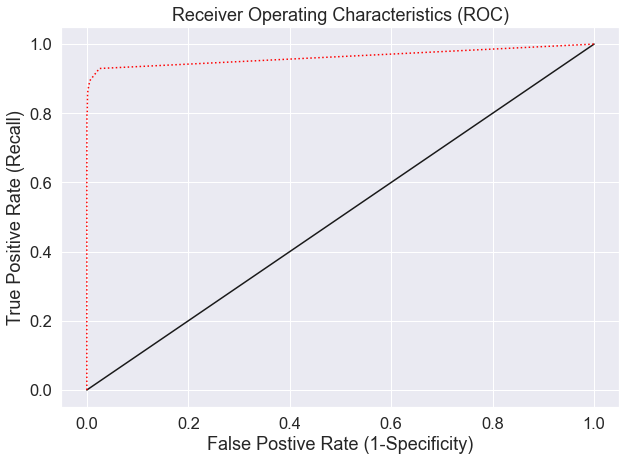

In [35]:
# Plotting the AUC curve

plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k')
plt.plot(fbr,tbr,':',color='red')
plt.xlabel('False Postive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC)')

## Feature Importance for Random Forest

In [36]:
# defining a function to plot feature importance

def plot_feature_importance(model,algo):
    
    # finding the important features
    DF = pd.DataFrame({'Feature_Name':list(X_train),'Feature_importance':model.feature_importances_})
    DF.sort_values(by='Feature_importance', ascending=False,inplace=True)
    
    # plotting the feature importance
    plt.figure(figsize=(17,9))
    sns.barplot(x=DF['Feature_importance'], y=DF['Feature_Name'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(algo+"'s Feature Importance")

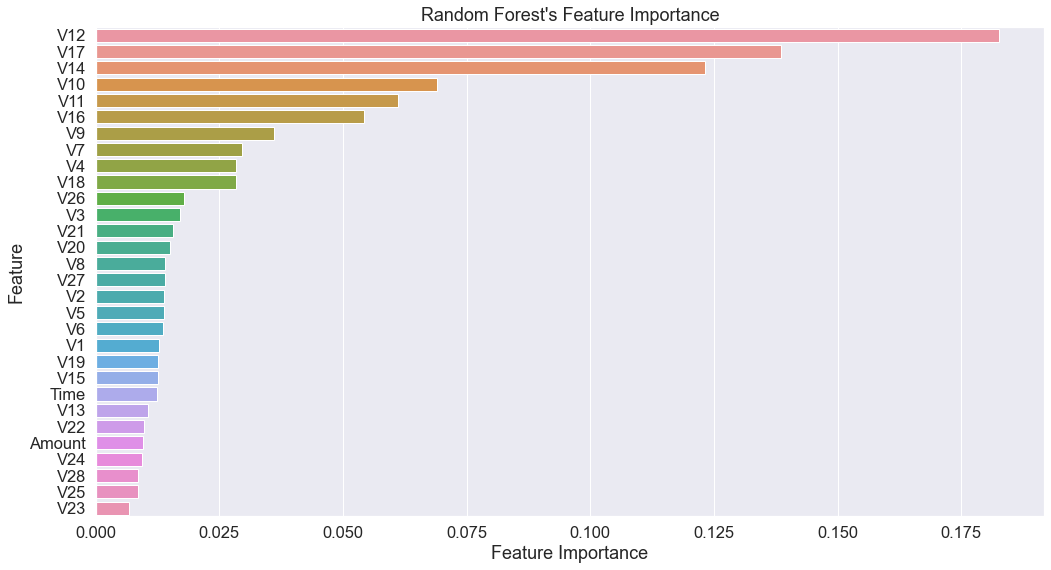

In [37]:
plot_feature_importance(rdf,'Random Forest')

### Defining a function to find insignificant features

In [38]:
# defining a function to find feature having less importance than the thresold

def features_tb_removed(model,thrsld):
    
    # finding feature importance
    DF = pd.DataFrame({'Feature_Name':list(X_train),'Feature_importance':model.feature_importances_})

    # finding features having less importance than thresold    
    feature=set()                                # variable to append feature
    for row_no in range(DF.shape[0]):
        if DF.iloc[row_no,1] < thrsld:           # conditional line to find insignificant feature
            feature.add(DF.iloc[row_no,0])       # appendong insignificant features to variable feature
    return feature

## Removing Insignificant features from the RF model

In [39]:
insgnfnt_featr_rf=list(features_tb_removed(rdf,0.0125))

In [40]:
## Removing Insignificant features from X_train

X_train_RF=X_train.drop(insgnfnt_featr_rf,axis=1)

In [41]:
rdf_imp = RandomForestClassifier(n_jobs=-1)

rdf_imp.fit(X_train_RF,Y_train)

RandomForestClassifier(n_jobs=-1)

## On train

In [42]:
rdf_imp_prd_trn = rdf_imp.predict(X_train_RF)
rdf_imp_prd_trn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
pd.DataFrame(confusion_matrix(Y_train,rdf_imp_prd_trn),index=labels,columns=labels)

,Legitimate Transactions,Fraud Transactions
Legitimate Transactions,226592,0
Fraud Transactions,1,387


In [44]:
print('Accuracy of Random forest (only significant features) on train :', accuracy_score(Y_train,rdf_imp_prd_trn))

Accuracy of Random forest (only significant features) on train : 0.9999955943254912


## On test

In [45]:
# droping insignificant features from test

X_test_RF=X_test.drop(insgnfnt_featr_rf,axis=1)

In [46]:
rdf_imp_prd_tst = rdf_imp.predict(X_test_RF)
rdf_imp_prd_tst

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
pd.DataFrame(confusion_matrix(Y_test,rdf_imp_prd_tst),index=labels,columns=labels)

,Legitimate Transactions,Fraud Transactions
Legitimate Transactions,56656,5
Fraud Transactions,26,59


In [48]:
print('Accuracy of Random forest (on significant features) on test :', accuracy_score(Y_test,rdf_imp_prd_tst))

Accuracy of Random forest (on significant features) on test : 0.9994537059880872


In [49]:
print(classification_report(rdf_imp_prd_tst,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56682
           1       0.69      0.92      0.79        64

    accuracy                           1.00     56746
   macro avg       0.85      0.96      0.90     56746
weighted avg       1.00      1.00      1.00     56746



## ROC for Random Forest (On Significant features)

In [50]:
from sklearn.metrics import roc_auc_score,roc_curve

In [51]:
rdf_tst_proba = rdf_imp.predict_proba(X_test_RF)[:,1]

In [52]:
print('AUC value for Random Forest (on significant features):',roc_auc_score(Y_test,rdf_tst_proba))

AUC value for Random Forest (on significant features): 0.9512521840419335


In [53]:
fbr,tbr,thrs = roc_curve(Y_test,rdf_tst_proba)

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'False Postive Rate (1-Specificity)')

Text(0, 0.5, 'True Positive Rate (Recall)')

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC)')

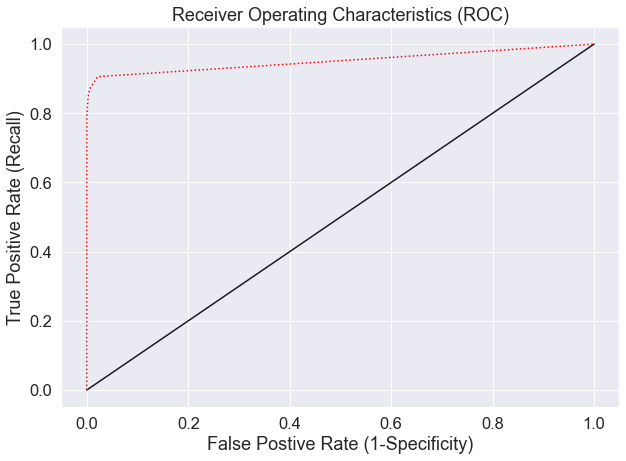

In [54]:
# Plotting the AUC curve

plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k')
plt.plot(fbr,tbr,':',color='red')
plt.xlabel('False Postive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC)')

# Prediction using XGboost (with default parameters)

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier(tree_method='gpu_hist', use_label_encoder=False, n_jobs=-1) # model with default parameters

In [57]:
xgb.fit(X_train,Y_train,eval_metric='auc') # training the model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# On train

In [58]:
xgb_prd_trn = xgb.predict(X_train)
xgb_prd_trn

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
print(pd.DataFrame(confusion_matrix(Y_train,xgb_prd_trn), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                   226592                   0
Fraud Transactions                             0                 388


In [60]:
print('Accuracy of XGboost on train :', accuracy_score(Y_train,xgb_prd_trn))

Accuracy of XGboost on train : 1.0


# On test

In [61]:
xgb_prd_tst = xgb.predict(X_test)
xgb_prd_tst

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
print(pd.DataFrame(confusion_matrix(Y_test,xgb_prd_tst), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                    56658                   3
Fraud Transactions                            25                  60


In [63]:
print('Accuracy of XGboost on test :', accuracy_score(Y_test,xgb_prd_tst))

Accuracy of XGboost on test : 0.9995065731505305


In [64]:
print('AUC score for XGboost (on default parameters):', roc_auc_score(xgb_prd_tst,Y_test))

AUC score for XGboost (on default parameters): 0.9759699515181759


## Hyperparameter Tuning for XGboost

In [65]:
xgb_param = {'n_estimators':[900,1000,1100,1200,1300],
             'max_depth':[3,4,5,6,7,8],
             'learning_rate':[0.005,0.01,0.02,0.03,0.04],
             'colsample_bytree':[0.3,0.4,0.5,0.6,0.7]}

In [66]:
from sklearn.model_selection import GridSearchCV

xgb_grid = GridSearchCV(estimator=XGBClassifier(tree_method='gpu_hist',use_label_encoder=False),
                        param_grid=xgb_param,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1,
                        verbose=1)

In [85]:
xgb_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits
[08:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method='gpu_hist',
                                     use_label_encoder=False,
              

In [86]:
xgb_grid.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.03,
 'max_depth': 6,
 'n_estimators': 1100}

In [67]:
# best fit model 

xgb_bst = XGBClassifier(n_estimators=1100,
                        max_depth=6,
                        colsample_bytree=0.4,
                        learning_rate=0.03,
                        tree_method='gpu_hist',
                        use_label_encoder=False)

In [68]:
xgb_bst.fit(X_train,Y_train,eval_metric='auc')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# On train

In [69]:
xgb_bst_prd_trn = xgb_bst.predict(X_train)
xgb_bst_prd_trn

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
print(pd.DataFrame(confusion_matrix(Y_train,xgb_bst_prd_trn), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                   226592                   0
Fraud Transactions                             0                 388


# On test

In [71]:
xgb_bst_prd_tst = xgb_bst.predict(X_test)
xgb_bst_prd_tst

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
print(pd.DataFrame(confusion_matrix(Y_test,xgb_bst_prd_tst), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                    56658                   3
Fraud Transactions                            25                  60


In [73]:
print('Accuracy of XGboost after parameter tuning on test :', accuracy_score(Y_test,xgb_bst_prd_tst))

Accuracy of XGboost after parameter tuning on test : 0.9995065731505305


## ROC for XGboost after Hyperparameter Tunning

In [74]:
xgb_bst_proba = xgb_bst.predict_proba(X_test)[:,1]

In [75]:
xgb_bst_fpr, xgb_bst_tpr, xgb_bst_thrs = roc_curve(Y_test,xgb_bst_proba)

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate (1 - Specificity)')

Text(0, 0.5, 'True Positive Rate (Recall)')

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC)')

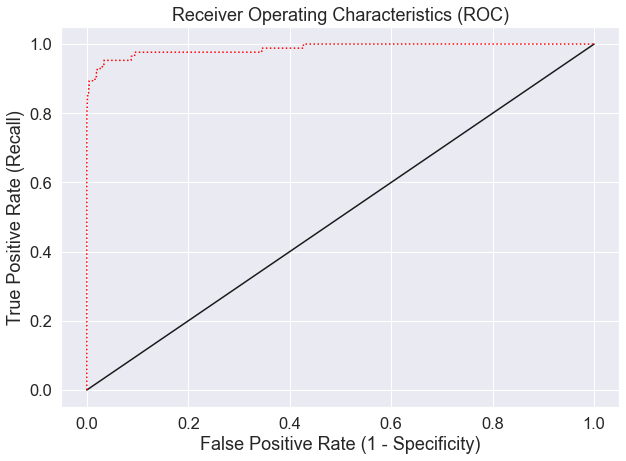

In [76]:
# plotting AUC curve

plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k')
plt.plot(xgb_bst_fpr, xgb_bst_tpr,':',color='red')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC)')

In [77]:
print('AUC score for XGboost after parameter tuning :', roc_auc_score(Y_test,xgb_bst_proba))

AUC score for XGboost after parameter tuning : 0.9871448044458425


## Feature importance for XGboost (after parameter tunning)

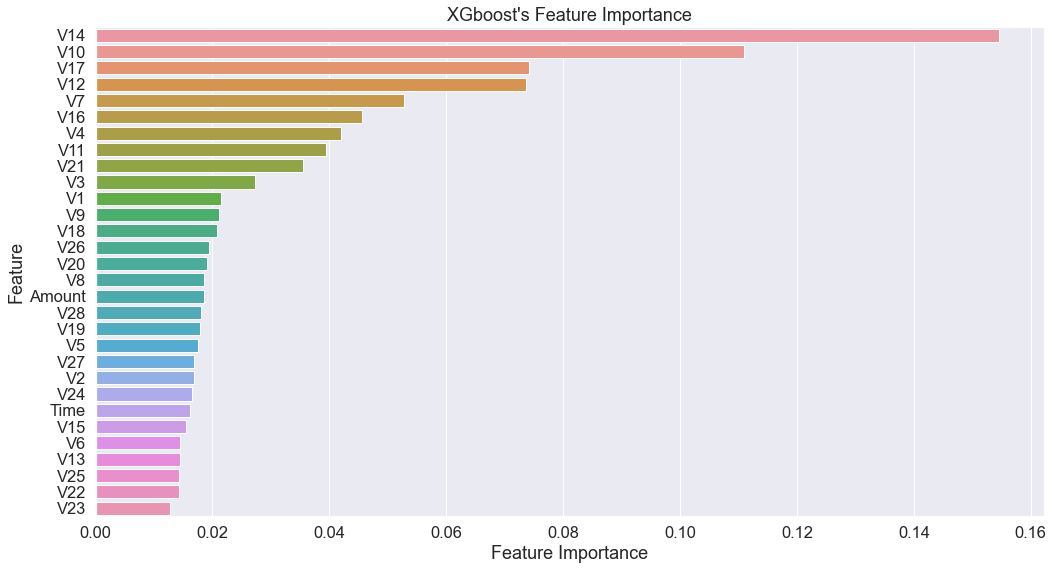

In [78]:
plot_feature_importance(xgb_bst,'XGboost')

# Prediction using Logistic Regression

As we know, Logistic Regression is a distance based algorithm and all the features need to be scaled before being used for training. All the columns are PCA transformed except Time and amount. Scaling Time and amount to feed the data for training logistic regression.

In [79]:
from sklearn.preprocessing import StandardScaler

X_train_scald = X_train.copy()               # copy of X_train
col_to_scald = ['Time','Amount']             # features to be scaled
featr = X_train_scald[col_to_scald]

scalr = StandardScaler()
scalr.fit(featr)

StandardScaler()

In [80]:
# transforming train data other than PCA transformed features

x_trn = scalr.transform(featr)               # transforming X_train
X_train_scald[col_to_scald] = x_trn

In [81]:
X_train_scald.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
158924,0.374899,-2.955617,-1.807269,0.288428,1.043848,-0.657473,-0.328328,0.872212,0.181270,0.070983,-0.903200,-1.299470,-0.336455,-0.480945,0.408289,0.661661,0.798935,-0.666928,0.565374,-0.974568,-0.352967,0.296883,0.696652,-0.666659,0.058703,-0.352203,-0.613740,0.548884,-0.634153,1.458825
85179,-0.717153,-0.926780,1.257414,1.337493,-0.251241,1.120411,-0.649394,1.423179,-0.330488,-0.939652,-0.031371,1.042365,0.685021,0.370909,0.208075,-0.547373,0.068805,-1.016245,0.217294,-0.291041,0.102706,0.002682,0.207431,-0.577729,0.030259,0.904522,-0.392648,-0.032085,-0.125592,-0.348298
202437,0.840032,2.015262,-0.097851,-1.586770,1.055784,0.746359,0.497370,-0.018712,0.066781,0.514171,0.346382,-0.336309,0.598495,-0.416983,0.333802,-1.263772,-0.152080,-0.691639,0.478855,0.344593,-0.242613,0.162511,0.704555,-0.128932,-0.189097,0.520441,-0.366796,0.005519,-0.067153,-0.312125
48821,-1.073458,-6.466280,-5.120985,0.881461,-0.412296,0.023292,0.302638,0.745833,-0.799876,0.722063,1.566295,1.243945,0.242032,0.838817,-2.020204,-0.968181,1.338793,-0.174169,-1.670853,1.042268,-3.251675,-1.191141,0.793610,1.395308,-0.153513,1.115056,-0.264281,-1.170124,2.766348,0.655465
184562,0.669203,2.119849,-1.472927,-1.080122,-1.893983,0.725872,4.119072,-2.314822,1.189868,0.474292,0.703182,-0.094368,-0.398616,0.312729,-0.700213,1.033377,1.579846,-0.191958,-0.815605,0.057942,0.048238,0.418236,1.222180,0.242711,0.738473,-0.376150,-0.069699,0.078010,-0.039317,-0.351753


In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
log_reg = LogisticRegression()

In [84]:
log_reg.fit(X_train_scald,Y_train)

LogisticRegression()

# On train

In [85]:
log_reg_prd_trn = log_reg.predict(X_train_scald)
log_reg_prd_trn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
print(pd.DataFrame(confusion_matrix(Y_train,log_reg_prd_trn), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                   226557                  35
Fraud Transactions                           149                 239


In [87]:
print('Accuracy of Logistic Regression on train:', accuracy_score(Y_train,log_reg_prd_trn))

Accuracy of Logistic Regression on train: 0.9991893558903868


# On test

In [88]:
# feature scaling for test

X_test_scaled = X_test.copy()
tst_feat = X_test_scaled[col_to_scald]
x_tst = scalr.transform(tst_feat)
X_test_scaled[col_to_scald] = x_tst
X_test_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
119483,-0.404157,-0.868316,0.310385,2.440775,-0.923164,-0.124800,0.116584,0.070864,0.434674,0.291963,-1.047113,0.946985,0.911082,-0.581674,-0.312058,-1.516148,0.558790,-0.703110,-0.244147,-1.759019,-0.287490,0.109391,0.346733,-0.058498,0.226926,-0.390286,-0.043309,0.097176,0.123567,-0.328484
17752,-1.388646,-0.797899,1.924714,-0.496497,0.649641,0.559371,0.020042,-0.015066,-3.396142,-0.289837,0.469879,-1.204169,0.272353,0.673993,0.421552,0.598156,-0.306965,-0.237618,0.125020,0.634913,-0.588350,3.122428,-0.537665,0.327733,-0.474439,-0.504046,-0.338321,0.615687,0.239678,-0.263841
185301,0.676010,-0.772459,0.927688,-0.587299,-2.056678,2.620595,3.670107,-0.013384,0.929972,0.995876,-0.370534,0.331056,-0.173121,-0.320220,-1.635131,0.915730,0.419224,0.148053,0.202274,-0.537258,0.418465,-0.377347,-0.767952,-0.017241,0.553453,-0.066833,-0.264769,0.217343,-0.002995,-0.341151
21013,-1.335454,-2.470088,1.445333,1.449623,1.991840,1.299102,2.278487,1.572548,-0.616953,0.890520,4.830925,2.979414,0.286641,0.221534,-1.442123,1.994828,-1.737175,0.132407,-1.757604,-0.705283,1.362997,-0.561796,0.758427,-0.232501,-1.015471,-0.510158,0.037589,-0.230830,-0.679720,-0.049778
247171,1.242679,2.075014,-1.331194,0.257760,-0.715151,-1.496807,0.570541,-1.781122,0.369112,0.748240,0.668248,0.397343,0.519973,0.039952,-1.034241,-1.699330,1.105779,0.241920,-0.789742,1.094459,-0.031798,0.183021,0.780388,0.269328,0.797639,-0.357503,-0.244888,0.054289,-0.040469,-0.347861


In [89]:
log_reg_prd_tst = log_reg.predict(X_test_scaled)
log_reg_prd_tst

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
print(pd.DataFrame(confusion_matrix(Y_test, log_reg_prd_tst), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                    56655                   6
Fraud Transactions                            41                  44


In [91]:
print('Accuracy of Logistic Regression on test:', accuracy_score(Y_test,log_reg_prd_tst))

Accuracy of Logistic Regression on test: 0.9991717477883904


In [92]:
print('AUC score of Logistic Regression on test:', roc_auc_score(Y_test,log_reg_prd_tst))

AUC score of Logistic Regression on test: 0.7587705829406469


# Logistic Regression using SMOTE

In [93]:
# No of observation of each class

print('Total no. of Fraud Transaction in train data :',sum(Y_train==1))
print('Total no og Legitimate Transaction in train data :',sum(Y_train==0))

Total no. of Fraud Transaction in train data : 388
Total no og Legitimate Transaction in train data : 226592


In [94]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=20, n_jobs=-1)

In [95]:
X_train_smote,Y_train_smote = smote.fit_resample(X_train_scald,Y_train)

In [96]:
log_reg_smote = LogisticRegression()

In [97]:
log_reg_smote.fit(X_train_smote,Y_train_smote)

LogisticRegression()

# On train

In [98]:
log_reg_smote_prd_trn = log_reg_smote.predict(X_train_smote)
log_reg_smote_prd_trn

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [99]:
print(pd.DataFrame(confusion_matrix(Y_train_smote,log_reg_smote_prd_trn), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                   221080                5512
Fraud Transactions                         17669              208923


In [100]:
print('Accuracy of logistic regression using SMOTE :', accuracy_score(Y_train_smote,log_reg_smote_prd_trn))

Accuracy of logistic regression using SMOTE : 0.9488485913006638


In [101]:
print('AUC score for Logistic Regression using SMOTE :',roc_auc_score(Y_train_smote,log_reg_smote_prd_trn))

AUC score for Logistic Regression using SMOTE : 0.9488485913006637


# On test

In [102]:
log_reg_smote_prd_tst = log_reg_smote.predict(X_test_scaled)
log_reg_smote_prd_tst

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [103]:
print(pd.DataFrame(confusion_matrix(Y_test,log_reg_smote_prd_tst), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                    55294                1367
Fraud Transactions                             9                  76


In [104]:
print('Accuracy of logistic regression using SMOTE :', accuracy_score(Y_test,log_reg_smote_prd_tst))

Accuracy of logistic regression using SMOTE : 0.975751594826067


In [105]:
print('AUC score for logistic Regression with SMOTE :',roc_auc_score(Y_test,log_reg_smote_prd_tst))

AUC score for logistic Regression with SMOTE : 0.9349958525264291


# ROC for Logistic Regression using SMOTE

In [106]:
log_reg_proba = log_reg_smote.predict_proba(X_test_scaled)[:,1]

In [107]:
log_reg_fpr, log_reg_tpr, log_reg_thrs = roc_curve(Y_test,log_reg_proba)

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate (1-Specificity)')

Text(0, 0.5, 'True Positive Rate (Recall)')

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC)')

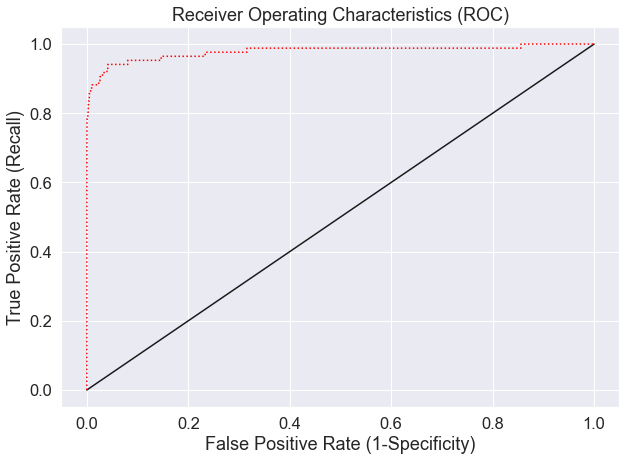

In [108]:
# Potting AUC curve

plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k')
plt.plot(log_reg_fpr, log_reg_tpr, ':', color='red')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC)')

In [109]:
print('AUC score for logistic Regression with SMOTE :',roc_auc_score(Y_test,log_reg_smote_prd_tst))

AUC score for logistic Regression with SMOTE : 0.9349958525264291


# Conclusion

* Random Forest - Randum Forest gives an AUC score of 0.9630 on test data using all the features and with default parameters of Random Forest. After removing features with feature importance leaa than 0.0125, RF gives an AUC score of 0.9513. AUC score has been decreased after removing some features, so removing features isn't a good idea as all the features are result of PCA transformation.


* XGBoost - XGBoost givea an AUC score of 0.9760 on test data using all the features and with default parameters. As removing features results a decrease in AUC score, hence using all the features is a better plan and XGBoost after Hyper Parameter Tunning on all the features results a AUC score of 0.9872 which is the highest AUC score of all the algorithms used.


* Logistic Regression - Logistic Regression gives an AUC score of 0.7588 with default parameters, We know as this is a imbalanced class problem, using SMOTE have improved the AUC score to 0.9350 with default parameter.

Out of all the three algorithms which are used, XGBoost gives best AUC score of 0.9872 after Hyper Parameter Tunning. XGBoost after HPT will be used as our final model for prediction and will be used in the model deployment.

In [110]:
import pickle

pickle.dump(xgb_bst,open('XGBoost.pkl','wb'))